In [1]:
import time

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

import networkx as nx
import networkx.algorithms.community as nx_comm

def mpl_setup():
    mpl.rc("font", size=20)
mpl_setup()

# Ex 3 - Modularity

In [2]:
# Import network

df = pd.read_csv("../PS1/data/10cityGCs.txt", sep="\t", header=None)
df.columns = ["city", "u", "v"]
df.head()

num_to_city = { # City codes to names
    1: "Edinburgh",
    2: "Glasgow",
    3: "Cardiff",
    4: "Bristol",
    5: "Nottingham",
    6: "Birmingham",
    7: "Sheffield",
    8: "Leeds",
    9: "Manchester",
    10: "London",
}
cities = [value for value in num_to_city.values()] # create list of cities

city_to_num = dict(
    zip(
        [value for value in num_to_city.values()],
        [key   for key   in num_to_city.keys()],
    ))


# Count nodes in each city
print("Number of nodes in each city:\n")
n_nodes = np.zeros(df.city.nunique())

for i, city in enumerate(df.city.unique()):
    us = set(df.loc[df.city == city].u.unique())
    vs = set(df.loc[df.city == city].v.unique())
    n_nodes[i] = len(us.union(vs))
    print("\t- {}: {:.0f}".format(num_to_city[i+1], n_nodes[i]))

Number of nodes in each city:

	- Edinburgh: 1645
	- Glasgow: 1802
	- Cardiff: 2685
	- Bristol: 2892
	- Nottingham: 2066
	- Birmingham: 1321
	- Sheffield: 2845
	- Leeds: 5263
	- Manchester: 7646
	- London: 16171


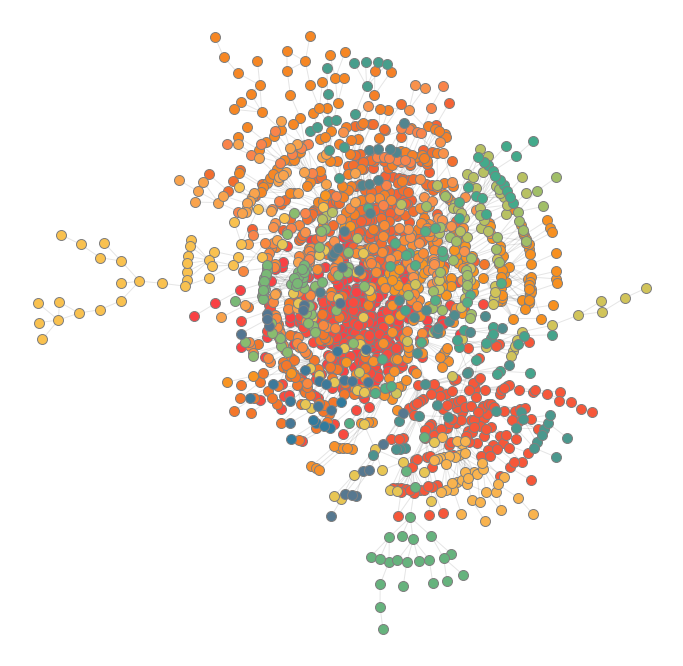

In [50]:
def get_network_city(city, city_to_num=city_to_num, df=df, cities_available=cities):
    """
    Outputs the nx network of a single city
    """
    assert city in cities_available, 'Invalid city!'
    g = nx.Graph()
    for idx, row in df.loc[df.city == city_to_num[city]].iterrows():
        g.add_edge(row["u"], row["v"])
    return g


# Get local networks
g_edi = get_network_city("Edinburgh")

palette = ["#f94144","#f3722c","#f8961e","#f9844a","#f9c74f","#90be6d","#43aa8b","#4d908e","#577590","#277da1"]

communities = nx.community.greedy_modularity_communities(g_edi)
communities = [list(x) for x in communities]

pos = nx.kamada_kawai_layout(g_edi)

fig, ax = plt.subplots(figsize=(12, 12))

colormap = LinearSegmentedColormap.from_list("", palette)
for i, community in enumerate(communities):
    node_color = np.array(colormap(i/len(communities))).reshape((1, -1)) # Just to avoid alerts
    nx.draw_networkx_nodes(
        g_edi,
        pos,
        nodelist=community,
        node_color=node_color,
        node_size=100,
        edgecolors="gray",
        ax=ax
    )
    
nx.draw_networkx_edges(
    g_edi,
    pos,
    color="gray",
    alpha=.1,
    ax=ax
)
ax.axis("off")
plt.show()


In [12]:
# Greedy maximization

print("Time:")
times = np.zeros(len(cities))
for i, city in enumerate(cities):
    t = time.time()
    communities = nx.community.greedy_modularity_communities(get_network_city(city))
    times[i] = time.time() - t
    print("\t- {}: {:.3f}s".format(city, times[i]))

Time:
	- Edinburgh: 0.939s
	- Glasgow: 1.115s
	- Cardiff: 2.331s
	- Bristol: 4.937s
	- Nottingham: 2.274s
	- Birmingham: 2.084s
	- Sheffield: 5.598s
	- Leeds: 18.067s
	- Manchester: 35.294s
	- London: 54.067s


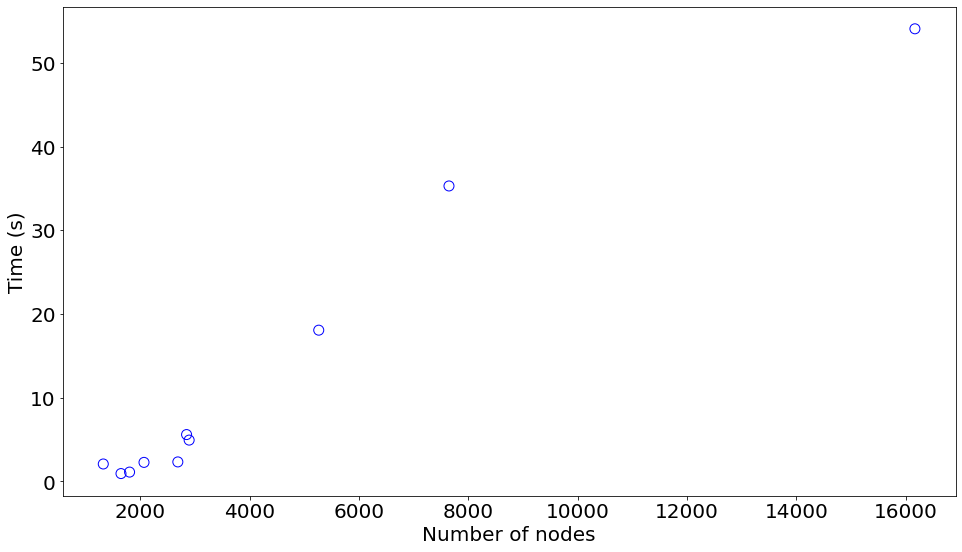

In [22]:
# Plot results
fig, ax = plt.subplots(figsize=(16, 9))
ax.scatter(n_nodes, times, marker = "o", facecolor="none", edgecolor="blue", s=100)
ax.set_xlabel("Number of nodes")
ax.set_ylabel("Time (s)")
plt.show()

# The algorithm runs essentially in linear time. Its complexity is O(n log^2 n)

In [2]:
help(nx.community.greedy_modularity_communities)

Help on function greedy_modularity_communities in module networkx.algorithms.community.modularity_max:

greedy_modularity_communities(G, weight=None)
    Find communities in graph using Clauset-Newman-Moore greedy modularity
    maximization. This method currently supports the Graph class and does not
    consider edge weights.
    
    Greedy modularity maximization begins with each node in its own community
    and joins the pair of communities that most increases modularity until no
    such pair exists.
    
    Parameters
    ----------
    G : NetworkX graph
    
    Returns
    -------
    Yields sets of nodes, one for each community.
    
    Examples
    --------
    >>> from networkx.algorithms.community import greedy_modularity_communities
    >>> G = nx.karate_club_graph()
    >>> c = list(greedy_modularity_communities(G))
    >>> sorted(c[0])
    [8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
    
    References
    ----------
    .. [1] M. E. J Newman